In [14]:
import numpy as np
import pandas as pd
import requests
import time
import csv
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import Select
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Scraping Data

In this notebook we are going to scrape 3 different wikipedia links, to obatin the results by state of the presidential, senatorial and guvernatorial elections. We are also going to scrape the dates of the presindetial elections from a different website.
The data will be cleaned in a separate notebook.

### Table of Contents

[1. Scrape Table 1: Presidential elections by state](#num1)

[2. Scrape Table 2: Dates of presidential Elections](#num2)

  [2.1 Add dates of presidential elections to table 1](#num2.1)

[3. Scrape Table 3: Senate elections by state](#num3)

[4. Scrape Table 4: House Representatives elections by state](#num4)

[5. Scrape Table 5: Governor elections by state](#num5)

<a name='num1'></a>

## 1. Presidential elections by state

First, we need the results of presidential elections for each state and every year since the 1800's to the 2022 election.

The figure below shows a small section of the Wikipedia's table that I will scrape.



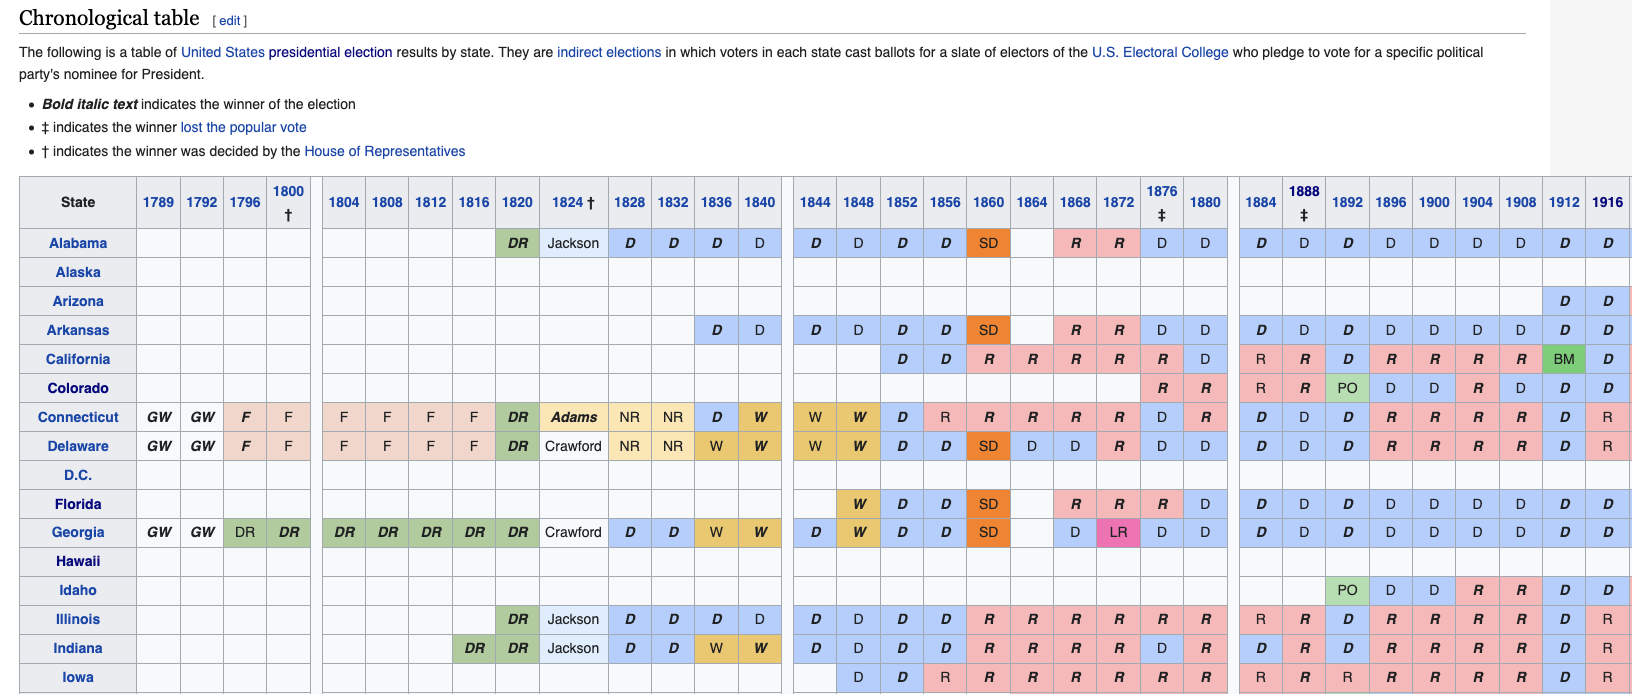

The legend for the table is:

R = Republican, D = Democratic, DR = Democratic-Republican

W = Whig, F = Federalist, GW = George Washington

NR = National Republican, SD = Southern Democrat, BM = Progressive "Bull Moose"

LR = Liberal Republican, AI = American Independent, SR = States' Rights

PO = Populist, CU = Constitutional Union, I = Independent

PR = Progressive, ND = Northern Democrat, KN = Know Nothing

AM = Anti-Masonic, N = Nullifier, SP = Split evenly

In [2]:
#------------------------------------------------------------------------------
''' Scrape the table for presidential elections. Obtain the elections' 
results for each cell (a row-column pair), 
representing one state and year. In other words, 
table's x-axis = years, table's y-axis = states.
'''

##*************** 1. fetch website and obtain the table of elections ******************##

website = 'https://en.wikipedia.org/wiki/List_of_United_States_'+\
        'presidential_election_results_by_state'
content = requests.get(website).text
soup = BeautifulSoup(content, 'lxml')
table = soup.find_all('table', class_='wikitable')[0]

##******************* 2. obtain the columns' headers (years) ******************##

first_row     = table.find_all('tr')[0] # headers are contained in the first row
columns_names = first_row.find_all('th')
headers       = []
for col in columns_names:
    headers.append(col.get_text(strip=True))
    

##******************* 3. write elections results in file ******************##

with open('presidential_by_state.csv', 'w', newline="") as f:
    writer = csv.writer(f)
    writer.writerow(headers[:-1])            # write headers (years). remove last column containing states names.
    
    states_rows = table.find_all('tr')[1:-1] # find all rows (except first and last rows with headers)
    for row in states_rows:
        state_name    = row.find_all('th')[0].get_text()
        results       = row.find_all('td')   # each row has the election's result for each year in columns
        state_results = [state_name]         # initiate list with state name, then append results 
        for res in results:                  
            state_results.append(res.get_text())
            
        writer.writerow(state_results)

#### Check results

In [3]:
df = pd.read_csv('presidential_by_state.csv')
df.head()

,State,1789,1792,1796,1800†,1804,1808,1812,1816,1820,...,1984,1988,1992,1996,2000‡,2004,2008,2012,2016‡,2020
0,Alabama\n,\n,\n,\n,\n,\n,\n,\n,\n,DR\n,...,R\n,R\n,R\n,R\n,R\n,R\n,R\n,R\n,R\n,R\n
1,Alaska\n,\n,\n,\n,\n,\n,\n,\n,\n,\n,...,R\n,R\n,R\n,R\n,R\n,R\n,R\n,R\n,R\n,R\n
2,Arizona\n,\n,\n,\n,\n,\n,\n,\n,\n,\n,...,R\n,R\n,R\n,D\n,R\n,R\n,R\n,R\n,R\n,D\n
3,Arkansas\n,\n,\n,\n,\n,\n,\n,\n,\n,\n,...,R\n,R\n,D\n,D\n,R\n,R\n,R\n,R\n,R\n,R\n
4,California\n,\n,\n,\n,\n,\n,\n,\n,\n,\n,...,R\n,R\n,D\n,D\n,D\n,D\n,D\n,D\n,D\n,D\n


<a name="num2"></a>

## 2. Dates of the presidential elections

In [4]:
website = 'https://en.wikipedia.org/wiki/List_of_elections_in_the_United_States'
content = requests.get(website).text
soup = BeautifulSoup(content, 'lxml')
hrefs = soup.select("a[href*=presidential]")
root = 'https://en.wikipedia.org'
links = []
for href in hrefs:
    branch = href['href']
    links.append(f'{root}{branch}')
    

In [5]:
election_dates = []
for link in links[3:]:
    content = requests.get(link).text
    soup = BeautifulSoup(content, 'lxml')
    tables = soup.select('table[style*="width:100%"]')
    table = tables[0]
    bbs = table.select('b')

    election_dates.append(bbs[0].get_text())

In [6]:
election_dates = [re.sub(r'\[.*|'u'\xa0.+','',date) for date in election_dates ]

In [7]:
### To add election dates to presidential data
# # separate the year and date, since we only need the year to match with the elections table
# dates_split = [date.split(',') for date in election_dates]
# # the initial years have weird dates, since the elctions were held for more than a day
# dates_split = dates_split[14:]
# # add the date of election to the elections table by matching the years
# for i in range(len(dates_split)):
#     year_date = int(dates_split[i][1])
#     dfp.loc[dfp['Year']==str(year_date), 'Election Date'] = dates_split[i][0] +','+ dates_split[i][1]
# # Save the results in the same file for presidential elections


In [8]:
# for i in range(len(dfp)):
#     pd.to_datetime(dfp['Election Date'].iloc[i]).date()

In [9]:
# dfp['Election Date'] = pd.to_datetime(dfp['Election Date'])

In [10]:
# dfp.to_csv('presidential_by_state_dates.csv')

<a name='num3'></a>
## 3. Scrape Senators data

The senatorial elections are scraped from https://en.wikipedia.org/wiki/List_of_United_States_presidential_election_results_by_state

The image below shows the table that I will scrape. 

#### Note:
We scrape the table one row at the time. Some states started having elections sooner than others. Thus, when a state did not have elections for many years, a white rectangle is spanned across multiple columns (see the figure below, <font color='red'> red</font> oval). In the code, we need to get the number of columns spanned with a white rectangle to add them as "NaN" in the csv file.

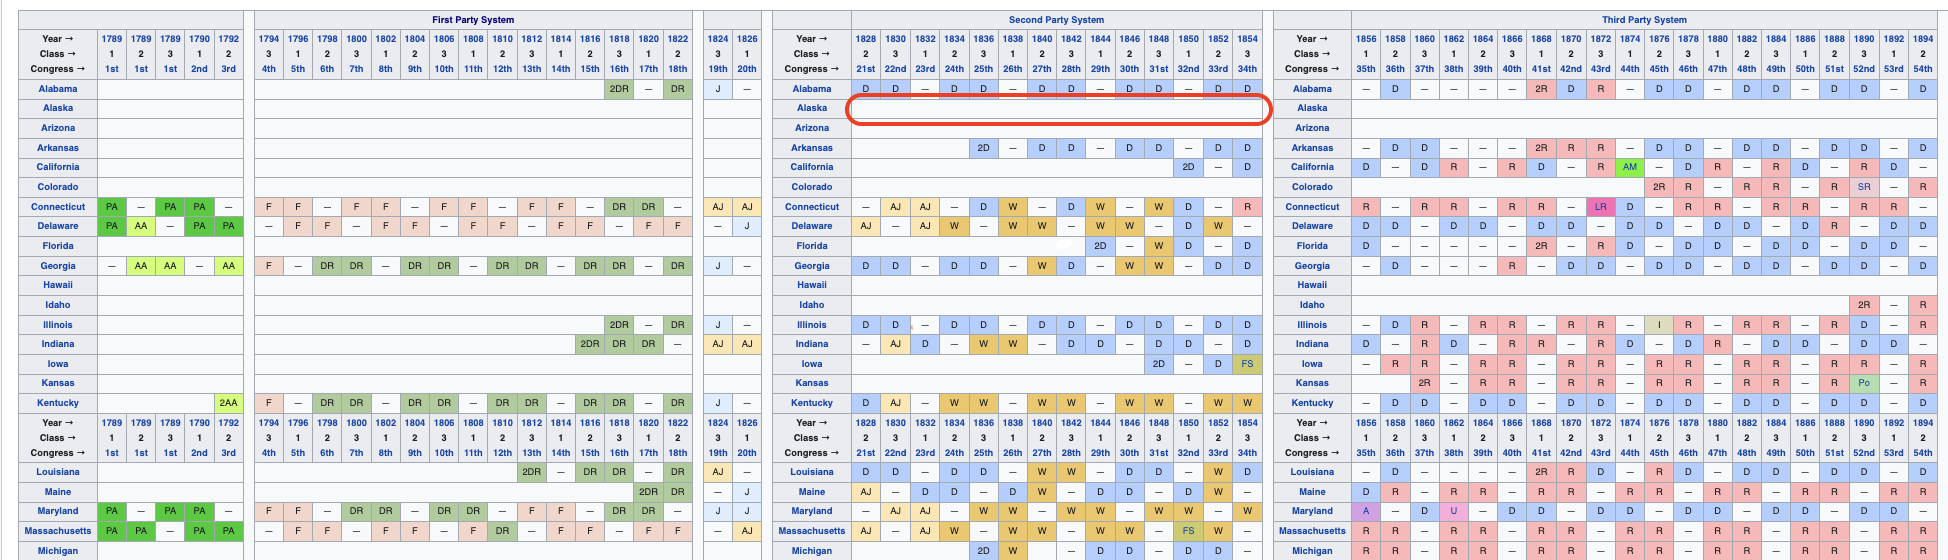



In [11]:
#------------------------------------------------------------------------------
''' 
    scrape the table for senatorial elections. obtan each row representing a 
    state, and all the columns representing the elections for each year (in 
    other words, table's x-axis = year, y-axis = state)
       
'''

##************ ** 1. fetch website, obtain table of elections ***********##

website = 'https://en.wikipedia.org/wiki/List_of_United_States_Senate_'+\
          'election_results_by_state'
content = requests.get(website).text
soup = BeautifulSoup(content, 'lxml')
table = soup.find_all('table', class_='wikitable')[1]

##*************** 2. obtain the columns' headers (state, years) ********##

rows = table.find_all('tr')
first_row = rows[1]                    # the first row contains headers
columns_names = first_row.find_all('th')
headers = []
for col in columns_names:
    
    possible_years = col.find_all('a') # find all the lists of <a> elements. each list has 3 elements. the first is the year
                                       # however, some lists of <a> are empty spaces.
    if len(possible_years)>1:          # select the list of <a> elements that contain more than one element.
       
        headers.append(possible_years[0].get_text())
        
##******************* 3. write elections results in file ******************##
        
with open('senators_by_state.csv', 'w', newline="") as f:
    writer = csv.writer(f)
    writer.writerow(headers[:])        # write headers with years
    
    
    for row in rows[2:-1]:             # skip the first two rows with headers
        
        results = []
        state = row.find_all('th')[0].get_text()
        
        if 'Year' not in state:        # some rows contain the word "Year", those rows are not scraped
            
            columns = row.find_all('td')
            results.append(state)
            
            ''' Here, check every element of the row to see whether spans or not 
               (see above Figure).
                If the element spans, we get the number "N_span" of spanned columns,
                and add "N_span" times the "NaN" element in the results.
                Important: The fourth spanned element (see figure above, red circle)
                spans one extra space than it should. 
                Thus, we count the number of spanned elements (ncolspan),
                and when "ncolspan" reaches 3 (4th element), we substract 
                one from "N_span" 
            '''
            
            ncolspan = 0                                                 # to keep track of spanned elements
            
            for col,i in zip(columns, range(len(columns))):
                
                colspan = re.findall(r'(colspan=\")([\d]*)\"', str(col)) # get the span number
                
                if len(colspan)==0:                                      # if it doesnt span, we add the result
                    results.append(col.get_text())
                    
                else:                                                   
                    ncolspan = ncolspan + 1                             # keep track of spanned elements
                    
                    if ncolspan == 4:
                        N_span = int(colspan[0][1]) - 1   # the fourth spanning element spans one more then it should
                    else:
                        N_span = int(colspan[0][1])
                    
                    results.extend(['NaN']*N_span)       # add NaNs 
            
            writer.writerow(results)                     # write to file


In [12]:
##******************* check results *******************##
df = pd.read_csv('senators_by_state.csv')
df.head()

,1789,1789.1,1789.2,1790,1792,1794,1796,1798,1800,1802,...,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Alabama\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R\n,R\n,—\n,R\n,R\n,—\n,R\n,R\n,—\n,R\n
Alaska\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R\n,R\n,—\n,D\n,R\n,—\n,R\n,R\n,—\n,R\n
Arizona\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,—\n,R\n,R\n,—\n,R\n,R\n,—\n,R\n,D\n,—\n
Arkansas\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D\n,—\n,D\n,R\n,—\n,R\n,R\n,—\n,R\n,NaN
California\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D\n,D\n,—\n,D\n,D\n,—\n,D\n,D\n,—\n,NaN


<a name='num4'></a>




## 4. Results of House of Representatives elections by state

### From 1789-2022

The representatives' data from 1789 to 2022 (1st to 117th congress) will be scraped from: https://voteview.com/congress/house

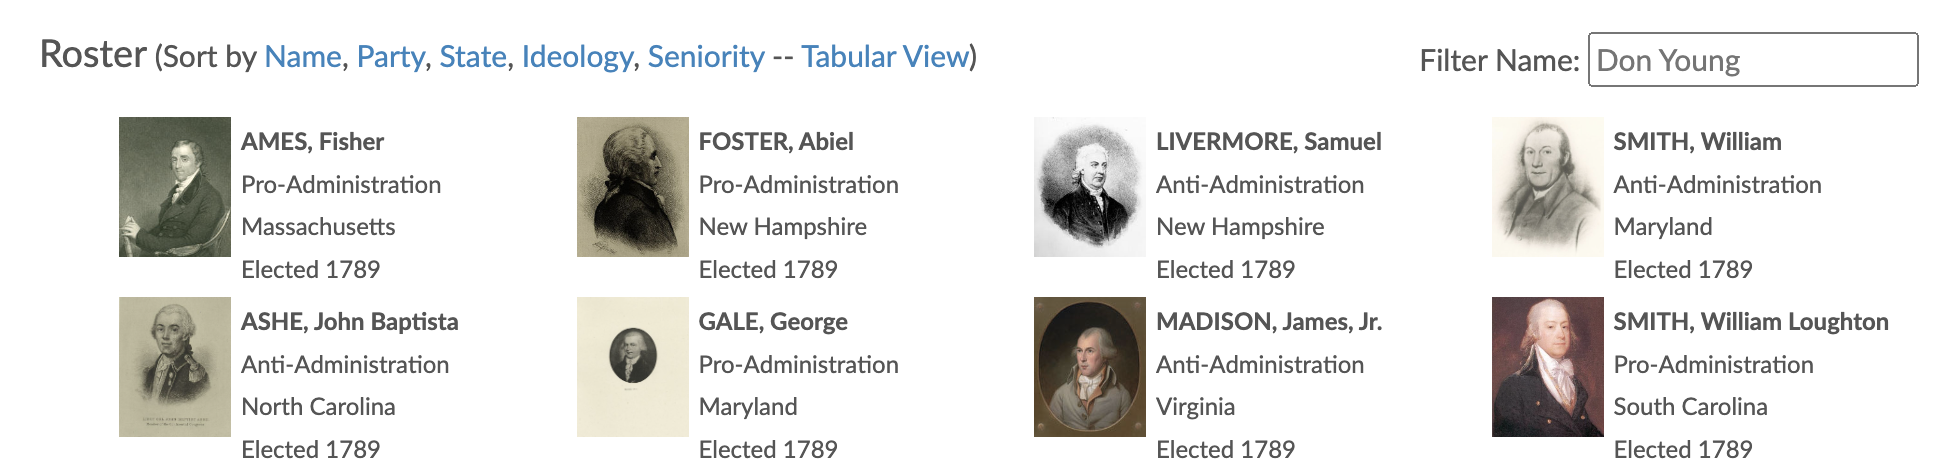

In [ ]:
# <!-- ### From 1929 - present
# The representatives' data from 1929 to present day will be scraped from: https://www.congress.gov/members where we select the option "House", and change the search to "250 results per page" (see figure below). This website runs on Javascript, therefore we use Selenium instead of Beautiful soup.


# ![fig06.png](attachment:fig06.png) -->

In [99]:
# # def info_history_house(
# #         result):
# #     """Scrapes info from 'result' and returns a list """
    
# #     name = result.find('a', class_='name').get_text()
# #     other_info = result.find_all('li')
# #     term = other_info[0].get_text().rsplit(':',1)[1:]
# #     # Instead of using split, we could use regex
# #     # term_str = other_info[0].get_text()
# #     # term = re.findall('(?<=Congress\(es\):)[\r\s\n\d,\w.]*', str(term_str))
# #     office = other_info[1].get_text().rsplit(':',1)[1:]
# #     state = other_info[2].get_text().rsplit(':',1)[1:]
# #     party = other_info[3].get_text().rsplit(':',1)[1:]

# #     return(
# #         [name, state[0], term[0], 
# #         office[0], party[0]]
# #          )
# def info_congress(
#     match):
#     name = match.find_element(by=By.XPATH, value=".//a").text

#     try:
#         state = match.find_element(by=By.XPATH, value =".//span[contains(.,'State:')]").text.rsplit(':',1)[1:]
#     except NoSuchElementException:
#         state = ['None']
    
#     try:
#         party = match.find_element(by=By.XPATH, value =".//span[contains(.,'Party:')]").text.rsplit(':',1)[1:]
#     except NoSuchElementException:
#         party = ['None']
        
#     try:
#         term = match.find_element(by=By.XPATH, value =".//span[contains(.,'House:')]").text.rsplit('House:',1)[1:]
#     except NoSuchElementException:
#         term = ['None']
    
#     return([name, state[0], term[0], 'None', party[0]])

In [102]:
# # #------------------------------------------------------------------------------
# # ## Website from 1789 to 1940, to be scraped with BeautifulSoup
# # root1 = 'https://history.house.gov/People/Search?Term=Search&SearchIn=LastName&'+\
# #        'ShowNonMember=true&ShowNonMember=false&Office=Representative&Leadership'+\
# #        '=&State=&Party=&ContinentalCongress=false&BlackAmericansInCongress=false'+\
# #        '&WomenInCongress=false&HispanicAmericansInCongress=false&AsianPacific'+\
# #        'AmericansInCongress=false&Dates=All&CongressNumberList=&PreviousSearch'+\
# #        '=Search%2cLastName%2cRepresentative%2c%2c%2c%2cFalse%2cFalse%2cFalse%2'+\
# #        'cAll%2c%2cCongress&CurrentPage=926&SortOrder=Congress&ResultType=List&Command='



# # Website from 1930 to 2022, to be scraped with Selenium
# root2 = 'https://www.congress.gov/members?q=%7B%22chamber%22%3A%22House%'+\
#    '22%2C%22congress%22%3A%22all%22%7D&pageSort=state&pageSize=250&page='


# with open('representatives_by_state.csv', 'w', newline="") as f:
    
#     writer = csv.writer(f)
#     writer.writerow(['Name', 'State', 'Term', 'Party'])  # Write headers
    
# #     ''' Scrape the table for house representative elections from 1789 to 1949.
# #     Obtain each row with a representative information: name, state, term, party. 
# #     For the website, we first do the search refinement on the website, and then
# #     use that link. The link would be cleaner and shorter if we do the search 
# #     refinement inside the code, however that would require more time.
# #     '''
# #     for num in range(1, 2):      # Go through 718 pages
# #         website  = f'{root1}{num}'
# #         print(website)
# #         content = requests.get(website).text
# #         soup = BeautifulSoup(content, 'lxml')
# #         results = soup.find_all('div', class_ = 'result')
    
# #         for result in results:
# #             try:
# #                 writer.writerow(info_history_house(result)) 
# #             except:
# #                 print(num, 'didnt work')
                
                
#     ''' Scrape the table for house representative data from 1930 to 2022. 
#     Obtain each row with a representative information: name, state, term, party. 
#     Data obtained from https://www.congress.gov. This websites runs on Javascript.
#     Thus, we use Selenium to scrape the data.
#     '''
#     time.sleep(2)
#     path = '/Users/angeles/Downloads/chromedriver'
#     driver = webdriver.Chrome(path)
#     for num in range(1, 2):      # Go through 9 pages
#         website  = f'{root2}{num}'
#         print(website)
#         driver.get(website)
#         time.sleep(2)
#         results = driver.find_elements(by=By.XPATH, value="//li[@class='expanded']")
        
#         for result in results:
#             try:
#                 writer.writerow(info_congress(result))
#             except:
#                 print(num, 'didnt work')

#     driver.quit()

https://history.house.gov/People/Search?Term=Search&SearchIn=LastName&ShowNonMember=true&ShowNonMember=false&Office=Representative&Leadership=&State=&Party=&ContinentalCongress=false&BlackAmericansInCongress=false&WomenInCongress=false&HispanicAmericansInCongress=false&AsianPacificAmericansInCongress=false&Dates=All&CongressNumberList=&PreviousSearch=Search%2cLastName%2cRepresentative%2c%2c%2c%2cFalse%2cFalse%2cFalse%2cAll%2c%2cCongress&CurrentPage=926&SortOrder=Congress&ResultType=List&Command=1


/var/folders/h2/9t3ny3fn0hg9vrlqr03wl9sm0000gn/T/ipykernel_41615/2007717538.py:48: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)


https://www.congress.gov/members?q=%7B%22chamber%22%3A%22House%22%2C%22congress%22%3A%22all%22%7D&pageSort=state&pageSize=250&page=1


In [11]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--blink-settings=imagesEnabled=false')

In [63]:
website = 'https://voteview.com/congress/house'
time.sleep(2)
path = '/Users/angeles/Downloads/chromedriver'
driver = webdriver.Chrome(path)
driver.get(website)
dropdown = Select(driver.find_element(by=By.ID, value="congSelector"))
congress_num = []
for drop in dropdown.options:
    congress_num.append(drop.text)
congress_num = congress_num[::-1]
driver.quit()

/var/folders/h2/9t3ny3fn0hg9vrlqr03wl9sm0000gn/T/ipykernel_55828/4036241692.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)


In [65]:
    
root = 'https://voteview.com/congress/house/'
path = '/Users/angeles/Downloads/chromedriver'
driver = webdriver.Chrome(path,options=chrome_options)
with open('representatives_by_state.csv', 'w', newline="") as f:

    writer = csv.writer(f)
    writer.writerow(['Name', 'State', 'Term', 'Party'])  # Write headers

    for num in range(1,118): # 1st to 70th (index 47:)
        
        website = f'{root}{num}/text'
        driver.get(website)
        results = WebDriverWait(driver,5).until(EC.presence_of_all_elements_located((By.XPATH,'//tr')))
        #names = [ii.text for ii in info]
        for ii in results[1:]:
            name = ii.find_element(by=By.XPATH, value ='.//td[2]').text
            party = ii.find_element(by=By.XPATH, value ='.//td[3]').text
            state = ii.find_element(by=By.XPATH, value ='.//td[4]').text
            term = congress_num[num-1]

            writer.writerow([name, state, term, party])

driver.quit()

/var/folders/h2/9t3ny3fn0hg9vrlqr03wl9sm0000gn/T/ipykernel_55828/967282241.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path,options=chrome_options)


In [28]:
# ### Method 1
# def extract_data(
#     writer, links_ppl, driver):
#     ''' Scrape the table for house representative data from 1789 to 1930. 
#     Obtain each row with a representative information: name, state, term, party. 
#     Data obtained from https://voteview.com/congress/house/. This websites runs on Javascript.
#     Thus, we use Selenium to scrape the data.
#     '''
#     for link in links_ppl:
#         path = '/Users/angeles/Downloads/chromedriver'
#         driver.get(link)
#         name = driver.find_element(by=By.XPATH, value='//h2').text
#         party = driver.find_element(by=By.XPATH, value='//span[contains(@id, "partyname")]').text
#         state = driver.find_element(by=By.XPATH, value='//h4').text.split('of',1)[1]
#         try:
#             term = driver.find_element(by=By.XPATH, value='//h4[contains(text(),"Serving in House")]').text.split('Serving in House',1)[1]
#         except NoSuchElementException:
#             term = driver.find_element(by=By.XPATH, value='//h4[contains(text(),"Served in House")]').text.split('Served in House',1)[1]

#         writer.writerow([name, state, term, party])

# root = 'https://voteview.com/congress/house/'
# path = '/Users/angeles/Downloads/chromedriver'
# driver = webdriver.Chrome(path,options=chrome_options)

# with open('representatives_by_state.csv', 'w', newline="") as f:

#     writer = csv.writer(f)
#     writer.writerow(['Name', 'State', 'Term', 'Party'])  # Write headers

#     for num in range(1,71): # 1st to 70th (index 47:)
#         website = f'{root}{num}'
#         driver.get(website)
#         links = WebDriverWait(driver,5).until(EC.presence_of_all_elements_located((By.XPATH,'//li[contains(@class,"memberResultBox")]//a[@href]')))

#         links_ppl=[]
#         links_ppl = [link.get_attribute('href') for link in links]


#         extract_data(writer, links_ppl[:], driver)
# driver.quit()

<a name='num5'></a>
## 5. Results of governors elections by state

Each state has a wikipedia page with historical governors elections. For example Missouri has the link https://en.wikipedia.org/wiki/List_of_governors_of_Missouri.  

We are going to scrape the table for each state with the same function to find the governor's name ('Governor'), the term in office ('Term') and the political affiliation ('Party'). The code is structured as it follows.

 ### Code flow:
 

- 1.  Find the correct table to scrape. Each wiki page has multiple tables with different information of past governors or a bio of the current governor. To find the correct table we require that it contains more than 4 strings representing years after 2000. Only Missouri and Vermont have more than one table with 2000's years (this was found after scraping, looking at the number of governors per state). These two states are corrected with if-else statements. 

- 2. Find the rows for each table.

- 3. Find the columns for each row.

    - 3.1 Find the "governor's name" column. The requisite is to find the first column that has more than 5 characters.

    - 3.2 Find the "term in office" column. For this, we find the column that contains the name of a month, and that is not the name column (sometimes the name column has the governor's date of birth, which also contains a month).

    - 3.3 Find the "party column". The column must contain a word referencing to a political party (see the list "parties" in the code below). If no party is found, it means the party was vertically spanned from previous governor.

- 4. Add the State, Governor, Term and Party columns in a csv file.
        
- 5. To check that the scraping went well, I count the number of governors per state. Also, in a separate notebook named "02_cleaning_data.jypnb", I inspected the data to find possible issues. Thus, this notebook was corrected multiple times.


### Issues detected:
The table's characteristics and position on the website vary from state to state, so the code needs to be flexible enough to be able to scrape each table. 

The image below ilustrate differences between three tables. 

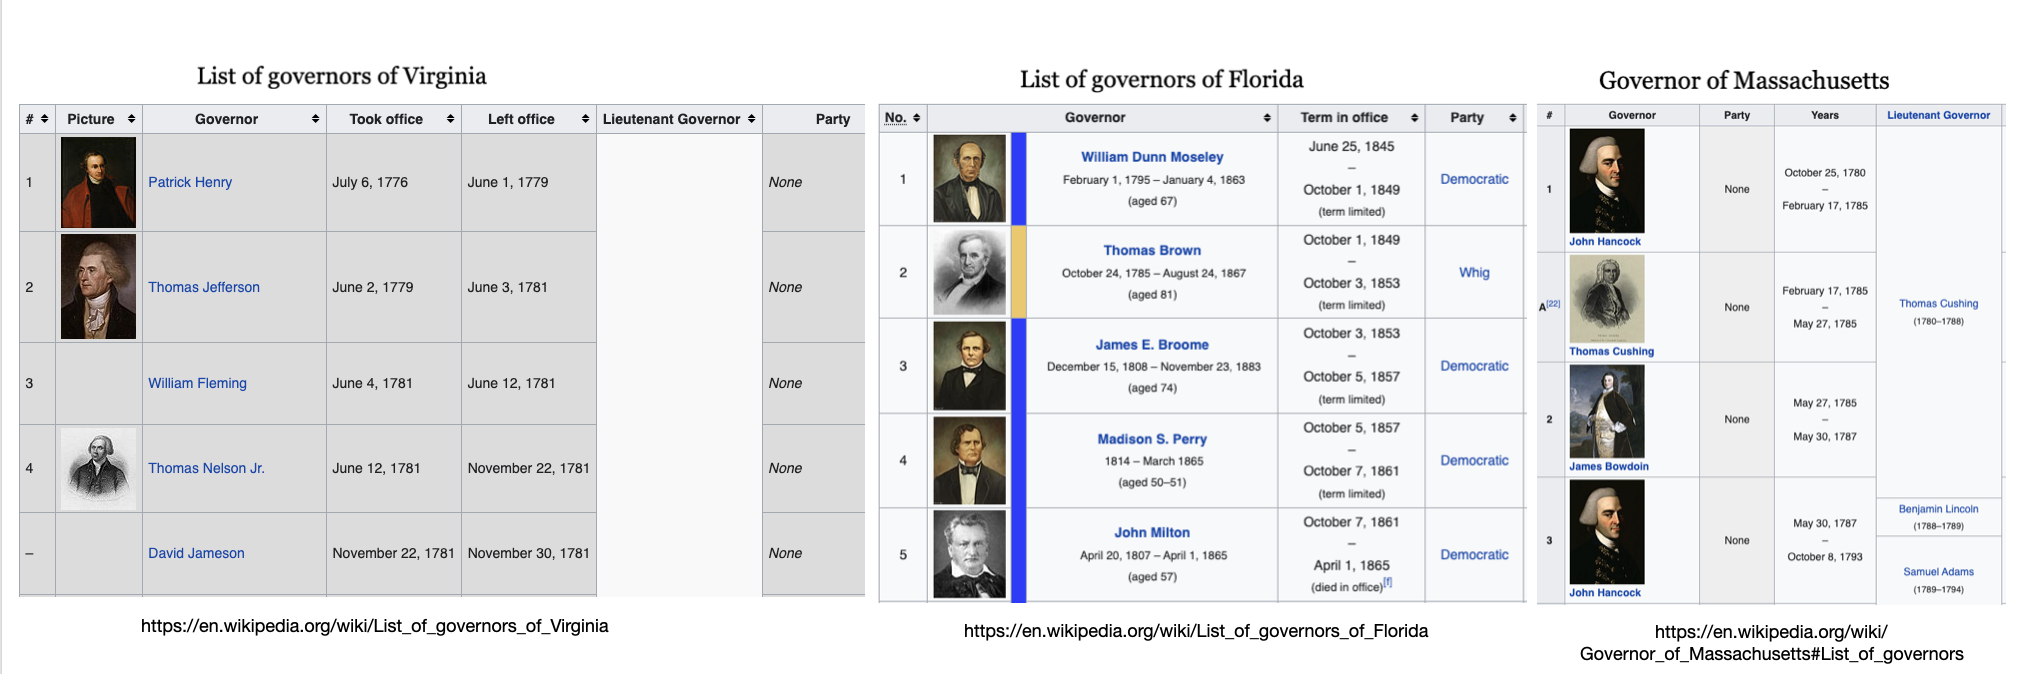

Most of the differences were catched once the data was scrapped, by looking at the number of governors per state.  I do not depict here the multiple trials I did. In what follows are listed some of the major differences found:

- #### Headers order:
Some tables have columns' headers that indicate the name of governor, years in office, and the governor's political affiliation in columns labeled as: "Governor", "Term in Office" and "Party". Other tables have the columns in a different orther: "Governor", "Party" and "Term". To find the columns we use steps 3.1-3.3 mentioned above.

- #### Governor's name:
In the HTML code, most states' tables have identifiers for governors' names as < td >, but Alaska, California, New_York, Michigan and Georgia have the names as < th >. This was found because those states had 0 governors when scrapped using < td > identifiers. 

- #### Term in office:
New_Hampshire, New_Mexico, Virginia, Washington and Vermont have 4 columns: "Governor", "Party", "Start of Term" and "End of Term". These 5 states are dealt with and if-else statement. This difference was found by looking at the column "Term" of the scrapped data (only one date was found, instead of a period of time).

- ####  Party:
When one or more governors in subsequent periods had the same party, the column "Party" is spanned vertically through multiple rows. In consequence, some rows don't have a "Party" cell. In the code we add and if-else statement, stating that if we reach the end of the row and no party was found we use the party from the previous governor.


In [13]:
#------------------------------------------------------------------------------
'''Read the wikipedia page for each state containing a table of governors.
'''


states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
        'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
        'Hawaii','Idaho', 'Illinois', 'Indiana', 'Iowa',
        'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
        'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
        'Montana', 'Nebraska', 'Nevada', 'New_Hampshire', 'New_Jersey',
        'New_Mexico', 'New_York', 'North_Carolina', 'North_Dakota', 'Ohio',
        'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode_Island', 'South_Carolina',
        'South_Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
        'Virginia', 'Washington', 'West_Virginia', 'Wisconsin', 'Wyoming'
         ]


with open(
    'governors_by_state.csv', 'w', newline = "") as f:   # open the file to write
    writer = csv.writer(f)
    col_names = ['State','Governor','Term','Party']   # columns' names 
    writer.writerow(col_names)

    for state in states:
        try:
            
            website = 'https://en.wikipedia.org/wiki/List_of_governors_of_' + state 
            get_governors(state, website, writer)        # function to obtain data
        
        except:
            
            print(state, 'Website doesnt exist')
            
def get_governors(
    state, website, writer):
    
    ''' Extracts governors' info from a state's website. Adds info to writer.
    Parameters
    ----------
    state : USA's state to obtain data.
    soup : the soup is already given by the website
    writer : 
    
    Returns
    -------
    A list of the name, state, party and term of each governor.
    This data is added into the writter.
    
    See Also
    --------
    '''
    
    # Some lists needed along the code
    months = ['January','February','March','April','May','June','July',\
             'August','September','October','November','December']
    
    parties = ['American','Republican', 'Democratic', 'Democrat','Independent',\
              'Partisan','Liberal', 'George,'\
              'Other','Federalist','Green', 'Republic', 'Whig',\ 
              'National', 'Libertarian', 'Populist', 'Socialist', 'Communist',\
              'Jacksonian', 'Jackson', 'Federal', 'Republic', 'Military',\
              'Progressive', 'Union', 'Labor', 'Ecologist', 'NPL','Association',\
              'League','Unionized','Unity','Unionist','Know','Nothing',\
              'None','Farmer','Silver', 'Rights', 'Anti', 'Nullifier', 'Split']

    years_20 = list(map(str, np.arange(2000, 2022,1)))

    ####**************************** 1. FIND THE TABLE ****************************####
    # First we find the table. The wikipedia pages have multiple tables. 
    # S ome of them contain governors from before the state
    # was form (1700-1800). other tables are short and contain a few facts about 
    # current governors. Thus, the criteria to find the correct table are:
    # 1- contains more than 4 governors in the 2000-2022 period
    # 2- has more than 20 rows

    content = requests.get(website).text                   # Fetch the website.
    soup = BeautifulSoup(content, 'lxml')
    tables = soup.find_all('table')                        # Returns all tables.
    
    if state == 'Missouri':                                # Missouri html code has a table (2) full of tables
        NUM_TABLE = 13
        print(state, "The table is " + str(NUM_TABLE))
    
    elif state == 'Vermont':                                # Vermont html code has a table (2) full of tables
        NUM_TABLE = 5
        print(state, "The table is " + str(NUM_TABLE))

    
    else:
        j=0
        while j <= len(tables):   
            try:
                table = tables[j]
                num_columns = len(table.find_all('tr'))
                all_cells = table.find_all('td')


                tot_years = 0                                  # Init number of 2000-2022 governors'
                for cell in all_cells:

                    if any(year in cell.get_text() for year in years_20):
                        tot_years = tot_years + 1
                    else:
                        tot_years = tot_years

                if int(num_columns) >= 21 
                    and tot_years > 4:   # If contains more than 20 rows
                        
                        NUM_TABLE = j
                        print(state, ": the table is " + str(j))
                        break
                else:
                        j = j + 1

            except:
                print('Not the correct table')


                
    try:
        table = soup.find_all('table')[NUM_TABLE]          # Correct table
    except:
        print(state, 'Table doesnt exist')      

    ####**************************** 2. FIND THE ROWS ****************************####
    
    rows  = table.find_all('tr')                           # All table's rows.
    
    ####**************************** 3. FIND THE COLUMNS ****************************####    
    
    for row, i in zip(rows[:], range(len(rows[:]))):
        columns = row.find_all('td')                       # All columns per row.
        if len(columns) > 4:                               # Only get rows with more than 4 columns.
            try:                                           # Some rows are just spanned.
                
                ####******************* 3.1 GOVERNOR'S NAME *******************####
                # Most states have the name in a HTML <td> tag.
                # the code iterates over each column until it finds one with 
                # more than 5 caracters (see table image above), then breaks.
                # California, New York and Michigan have the name as <th> tag.
        
                if state in ['Alaska','California', 
                            'New_York', 'Michigan', 'Georgia']:
                    th_column = row.find_all('th')
                    for th in th_column:
                        name = th.find('a').get_text()           # Name is containd in <th>.
                        NUM_NAME = 0
                
                elif state == 'New_Jersey':                      # New Jersey has two //th//a components per row
                    th_column = row.find_all('th')
                    th = th_column[1]
                    name = th.find('a').get_text()               # Name is containd in <th>.
                    NUM_NAME = 0  
                
                else:

                    k=0
                    while k <= len(columns):
                        col = columns[k]

                        if len(col.get_text()) > 5:
                            NUM_NAME = k
                            name = columns[NUM_NAME].get_text()  # Name is the first <td> column with. 
                            break                                # More than 5 caracters.
                        else:
                            k = k + 1  


                ####******************* 3.2 TERM IN OFFICE *******************####    
                # Most states have one column indicating the start-and-end of the term in office 
                # for each governor. 
                # some states ('New_Hampshire', 'New_Mexico', 'Virginia', 'Washington', 'Vermont')
                # have two separate columns for the start and end of term. thus, we treat them differently.

                k=0
                while k <= len(columns):                
                    col = columns[k] 
                    
                    if any(month in col.get_text() for month in months) 
                        and k!=NUM_NAME:
                        
                        NUM_TERM = k
                        if state in ['New_Hampshire', 'New_Mexico', 
                                    'Virginia', 'Washington', 'Vermont']:      # get start and end (for separate columns case)
                            term_init = columns[NUM_TERM].get_text()
                            term_final = columns[NUM_TERM + 1].get_text()
                            term = term_init + "-" + term_final
                        else:
                            term = columns[NUM_TERM].get_text()   # Get term (one column with start and end)
                        break
                    else:
                        k = k + 1
                


                ####******************* 3.3 PARTY *******************####
                # The party column is determined by its content. if contains any word representing 
                # a political party and is not the name or the term in office, then it is selected as party.
                # if two or more governors in a row have the same party, then the same column is spanned
                # over those governors. therefore, if we reach the last column and no party was found
                # we use the party of the previous governor.
                
                k=0
                while k <= len(columns):
                    col = columns[k]
                    if any(party in col.get_text() for party in parties)
                        and k!= NUM_NAME and k!=NUM_TERM:
                            
                        NUM_PARTY = k
                        party = columns[NUM_PARTY].get_text()
                        # Dealing with governors that have party spanned from previous one.
                        party_prev = columns[NUM_PARTY].get_text() # Get party for next governor.
                        break                                      # (In case the next doesnt have one)
                    
                    else:
                        if k == len(columns) - 1:                  # If we reach the end with no party.
                            party = party_prev                     # We use the previous governor's party.
                            break                                  
                        else:
                            k = k + 1

                
                ####**********=******** 4. SAVE THE DATA *****************####          
                
                writer.writerow([state, name, term, party])
            
            except:
                pass



In [15]:
##******************* check results *******************##
''' Before we analyze the data we need to check that it is correct.
 For example, by counting the number of governors by state I realized that Alaska only
 had one governor, thus, after checking I had to add Alaska to the states with exceptions,
 and it was corrected where now I have 8. Large part of the checking is done by eye inspection.'''

path = '/Users/angeles/Desktop/GitHub/presidential/'
df = pd.read_csv(path + 'governors_by_state.csv')
print('Number of states: ', len(df['State'].unique()))
print('Number of governors by state: ', df[['State','Governor']].groupby('State').count())


Number of states:  50
Number of governors by state:                  Governor
State                   
Alabama               61
Alaska                14
Arizona               27
Arkansas              57
California            39
Colorado              43
Connecticut           73
Delaware              65
Florida               46
Georgia               89
Hawaii                 8
Idaho                 33
Illinois              45
Indiana               51
Iowa                  43
Kansas                48
Kentucky              63
Louisiana             63
Maine                 75
Maryland              67
Massachusetts         56
Michigan              49
Minnesota             41
Mississippi           64
Missouri              57
Montana               25
Nebraska              41
Nevada                30
New_Hampshire         95
New_Jersey            33
New_Mexico            32
New_York              61
North_Carolina        48
North_Dakota          33
Ohio                  70
Oklahoma              

In [5]:
import json
import re
import requests
import pandas as pd 
import numpy as np
import urllib
from bs4 import BeautifulSoup

In [6]:
congress_numbers = [111,112,113,114,115,116]
page_size = 250

In [7]:
def get_congress_url(congress_numbers, page_size, page):
    congress_q_str = "{" + '"congress":[{}]'.format(','.join('"{0}"'.format(num) for num in congress_numbers)) + "}"
    params= {
        "q": congress_q_str,
        "pageSize" : page_size,
        "page" : page,
        "searchResultViewType": "expanded",
        "KWICView": "true"
    }
    actual_params = urllib.parse.urlencode(params, safe='{}:[]')
    return "https://www.congress.gov/members?{}".format(actual_params)

def get_num_pages(soup):
    page_num_element = soup.find("div", {"class": "basic-search-tune-number"}).find("div", {"class": "pagination"}).find("span", {"class": "results-number"}).text
    page_num_raw = [int(s) for s in page_num_element.split() if s.isdigit()]
    return int(page_num_raw[0])

In [8]:
def extract_member_name_url(entry):
    result_heading = entry.find("span", {"class": "result-heading"})
    member_name = result_heading.text
    if "Representative" in member_name:
        member_name = member_name.replace("Representative", "").strip()

    elif "Senator" in member_name:
        member_name = member_name.replace("Senator", "").strip()
    
    url = result_heading.a['href']
    return [member_name, url]   

def extract_congress_members(congress_list):
    members = []
    for entry in congress_list:
        member = {}
        [member["name"], member["url"]] = extract_member_name_url(entry)
        
        members.append(member)
    return members

In [9]:
congress_url = get_congress_url(congress_numbers, page_size, 1)
print("Congress URL: ", congress_url)

response = requests.get(congress_url).text
soup = BeautifulSoup(response, "html.parser")

num_pages = get_num_pages(soup)
print("Number of result pages: ", num_pages)

Congress URL:  https://www.congress.gov/members?q={%22congress%22:[%22111%22%2C%22112%22%2C%22113%22%2C%22114%22%2C%22115%22%2C%22116%22]}&pageSize=250&page=1&searchResultViewType=expanded&KWICView=true


AttributeError: 'NoneType' object has no attribute 'find'